<a href="https://colab.research.google.com/github/emilyj19/TS/blob/master/Deep_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch

In [0]:
import numpy as np 
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
root_path = 'gdrive/My Drive/FinancialTS/JPmarket_dataset.npz' 
data = np.load(root_path)
data.files

['train_ratios', 'test_ratios', 'train_volumes', 'test_volumes']

In [0]:
train_ratios = data['train_ratios']
test_ratios = data['test_ratios']
train_vols = data['train_volumes']
test_vols = data['test_volumes']

In [0]:
av_vols = np.mean(train_vols[3], axis = 0)

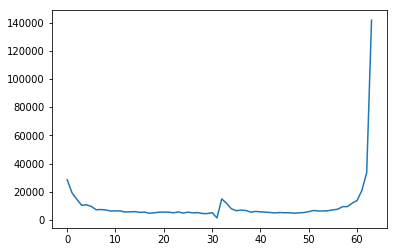

In [7]:
plt.plot(av_vols)

In [0]:
#create covariates - currently one hot vector 64 dims but experiment with different ideas 
def create_covariate_data(input_data, freq = 64): #this is assuming that data starts at beginning of day and ends at last bin of the day 
  num_series, len_series = input_data.shape
  days = int(len_series/freq)
  covariate_vectors = np.zeros((num_series, len_series, freq+1))
  
  for n in range(num_series):
    for d in range(days): 
      for t in range(freq): 
        one_hot = np.zeros(freq)
        one_hot[t] = 1
        covariate_vectors[n, d*64 + t, 0] = input_data[n, d*64 + t]
        covariate_vectors[n, d*64 + t, 1:] = one_hot
        
  return covariate_vectors

In [0]:
train_volume = train_vols[0:50].reshape((50,-1))

norm_train_vols = np.zeros((50, 29568))
for i in range(50): 
  norm_train_vols[i] = train_volume[i]/np.amax(train_vols[i])
  
T = 64*3
new_train_data = norm_train_vols[:,:T]

covars_data = create_covariate_data(new_train_data)

covars_data = torch.FloatTensor(covars_data)

In [0]:
class GlobalEffects(nn.Module): 
  def __init__(self, input_size, num_factors, hidden_size, batch_size = 1, output_size = 1, num_layers = 1): 
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.batch_size = batch_size
    self.output_size = output_size
    self.num_layers = num_layers
    
    #how can I simplify this code and also let number of factors be a variable?
    
    self.lstm1 = nn.LSTM(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.num_layers)
    self.lstm2 = nn.LSTM(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.num_layers)
    self.lstm3 = nn.LSTM(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.num_layers)
    self.lstm4 = nn.LSTM(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.num_layers)
    self.lstm5 = nn.LSTM(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.num_layers)
    self.lstm6 = nn.LSTM(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.num_layers)
    self.lstm7 = nn.LSTM(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.num_layers)
    self.lstm8 = nn.LSTM(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.num_layers)
    self.lstm9 = nn.LSTM(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.num_layers)
    self.lstm10 = nn.LSTM(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.num_layers)
    
    self.w = torch.nn.Parameter(torch.zeros(batch_size, num_factors))
    
  def init_hidden(self): 
    return (torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
            torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
            torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
            torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
            torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
            torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
            torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
            torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
            torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
            torch.zeros(self.num_layers, self.batch_size, self.hidden_size))

  def forward(self, input_data, hidden): 
    x = input_data[:,1:]
    hidden1, hidden2, hidden3, hidden4, hidden5, hidden6, hidden7, hidden8, hidden9, hidden10 = hidden
    g1, hidden1 = self.lstm1(x.view(len(x), self.batch_size, -1))
    g2, hidden2 = self.lstm2(x.view(len(x), self.batch_size, -1))
    g3, hidden3 = self.lstm3(x.view(len(x), self.batch_size, -1))
    g4, hidden4 = self.lstm4(x.view(len(x), self.batch_size, -1))
    g5, hidden5 = self.lstm5(x.view(len(x), self.batch_size, -1))
    g6, hidden6 = self.lstm6(x.view(len(x), self.batch_size, -1))
    g7, hidden7 = self.lstm7(x.view(len(x), self.batch_size, -1))
    g8, hidden8 = self.lstm8(x.view(len(x), self.batch_size, -1))
    g9, hidden9 = self.lstm9(x.view(len(x), self.batch_size, -1))
    g10, hidden10 = self.lstm10(x.view(len(x), self.batch_size, -1))

    g = torch.cat((g1.view(-1,1), g2.view(-1,1), g3.view(-1,1), g4.view(-1,1), g5.view(-1,1), g6.view(-1,1), g7.view(-1,1), g8.view(-1,1), g9.view(-1,1), g10.view(-1,1)), dim=1)
    #fixed_effects = torch.sum(g.view(-1, 1) * self.w)
    #print('f', fixed_effects.shape)
    
    fixed_effects = torch.zeros(g.shape[0])
    for i in range(g.shape[0]): 
      fixed_effects[i] = torch.dot(self.w.view(-1), g[i])

    return fixed_effects
    
    #NEED TO ADD AN ATTENTION LAYER HERE 
    #also, maybe should have more hidden layers and then a dense layer to get the dims down to 1
    #make hidden layers separate names and initialize 10 of them?
      

In [0]:
class GlobalEffects2(nn.Module): 
  def __init__(self, input_size, num_factors, hidden_size, batch_size = 1, output_size = 1, num_layers = 1): 
    super().__init__()
    self.input_size = input_size
    self.num_factors = num_factors
    self.hidden_size = hidden_size
    self.batch_size = batch_size
    self.output_size = output_size
    self.num_layers = num_layers
    
    self.lstms = {}
    for i in range(self.num_factors): 
      new_lstm = 'lstm{}'.format(i+1)
      self.lstms[new_lstm] = nn.LSTM(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.num_layers)
    
    self.w = torch.nn.Parameter(torch.zeros(batch_size, num_factors))
    
  def init_hidden(self): 
    return torch.zeros(self.num_layers, self.batch_size, self.hidden_size)

  def forward(self, input_data, hidden): 
    x = input_data[:,1:]
    g_dict = {}
    for i in range(self.num_factors): 
      new_g = 'g{}'.format(i+1)
      g_dict[new_g], hidden = self.lstms['lstm{}'.format(i+1)](x.view(len(x), self.batch_size, -1))
      
      if i == 0: 
        g = g_dict['g{}'.format(i+1)].view(-1,1)
      else: 
        g = torch.cat((g,g_dict['g{}'.format(i+1)].view(-1,1)), dim=1)

    #fixed_effects = torch.sum(g.view(-1, 1) * self.w)
    #print('f', fixed_effects.shape)
    
    print('g', g)
    
    fixed_effects = torch.zeros(g.shape[0])
    for i in range(g.shape[0]): 
      fixed_effects[i] = torch.dot(self.w.view(-1), g[i])
      
    print('w', self.w)
    print('fixed', fixed_effects)
      
    return fixed_effects
    
    #NEED TO ADD AN ATTENTION LAYER HERE 
    #also, maybe should have more hidden layers and then a dense layer to get the dims down to 1
    #make hidden layers separate names and initialize 10 of them?
      

In [0]:
class DF_RNN(nn.Module): 
  def __init__(self, input_size, hidden_size, batch_size, output_size):
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.batch_size = batch_size
    self.output_size = output_size

    self.rnn = nn.RNN(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = 1)
    self.linear = nn.Linear(self.hidden_size, self.output_size)
    
  def init_hidden(self): 
      return torch.zeros(1, self.batch_size, self.hidden_size)
    
  def forward(self, input_data, hidden, fixed_effects, gaussian_likelihood): 
    z = input_data[:,0]
    x = input_data[:,1:]
    rnn_out, hidden = self.rnn(x.view(len(x), self.batch_size, -1))
    sigma = self.linear(rnn_out).view(-1)
    sigma = torch.abs(sigma)
    r = torch.zeros(sigma.shape[0])
    for i in range(sigma.shape[0]):
      r[i] = torch.distributions.normal.Normal(0, sigma[i]).rsample()
    u = fixed_effects + r
    
    if gaussian_likelihood == True: 
      log_lik = self.log_likelihood_Gaussian(z, fixed_effects, sigma)
    
    else: 
      log_lik = self.log_likelihood_nonGaussian()
    
    return log_lik
   
  def log_likelihood_Gaussian(self, z, f, sigma):
    log_p = torch.zeros(len(z))
    for i in range(len(z)): 
      log_pdf = torch.distributions.normal.Normal(0, sigma[i]).log_prob(z[i] - f[i])
      #scale the likelihood to 0-1
      log_norm_constant = torch.distributions.normal.Normal(0, sigma[i]).log_prob(0)
      log_p[i] = log_pdf - log_norm_constant
      
    #print('p', torch.exp(log_p))
      
    #set neg infinite values to -10 to avoid batch loss becoming infinite 
    log_p[log_p == -float("inf")] = -10
    
    #print('logp', log_p)
    
    log_lik = torch.sum(log_p)
    #print('log_lik', log_lik)
      
    return log_lik
  
  
  def log_likelihood_nonGaussian(self, ):
    pass

In [0]:
global_model = GlobalEffects(input_size = 64, num_factors = 10 , hidden_size = 1)  
local_model = DF_RNN(64, hidden_size = 5, batch_size = 1, output_size = 1)

In [0]:
learning_rate = 0.0001
batch_size = 50
num_epochs = 100

In [412]:
#loss_function = torch.nn.NLLLoss()
optimiser = torch.optim.SGD(list(global_model.parameters()) + list(local_model.parameters()), lr = learning_rate)

#optimiser_global = torch.optim.SGD(global_model.parameters(), lr = learning_rate)
#optimiser_local = torch.optim.SGD(local_model.parameters(), lr = learning_rate)

train_loss = []

for t in range(num_epochs): 
  global_model.zero_grad()
  global_hidden = global_model.init_hidden()
  
  local_model.zero_grad()
  local_hidden = local_model.init_hidden()
  
  data_batch = covars_data
  
  neg_batch_loss = 0 
  fixed_effects = global_model(data_batch[0], global_hidden)
  
  for i in range(batch_size): 
    data = data_batch[i]
    
    #fixed_effects = global_model(data, global_hidden) # this could be taken out of the for loop as if we keep the same covariate structure for  every series then g will be the same for each TS
    log_lik = local_model(data, local_hidden, fixed_effects, gaussian_likelihood = True)
    
    neg_batch_loss += log_lik
    
  batch_loss = -1*neg_batch_loss
    
  optimiser.zero_grad()
  
  batch_loss.backward()

  optimiser.step()
  
  train_loss.append(batch_loss.item())
  
  print("Epoch: ", t, "loss: ", batch_loss.item())

Epoch:  0 loss:  8012.53564453125
Epoch:  1 loss:  37.55162811279297
Epoch:  2 loss:  36.179325103759766
Epoch:  3 loss:  35.237632751464844
Epoch:  4 loss:  34.48215103149414
Epoch:  5 loss:  33.829078674316406
Epoch:  6 loss:  33.24056625366211
Epoch:  7 loss:  32.695770263671875
Epoch:  8 loss:  32.18191909790039
Epoch:  9 loss:  31.691165924072266
Epoch:  10 loss:  31.218242645263672
Epoch:  11 loss:  30.75948143005371
Epoch:  12 loss:  30.31188201904297
Epoch:  13 loss:  29.873844146728516
Epoch:  14 loss:  29.44371795654297
Epoch:  15 loss:  29.02033042907715
Epoch:  16 loss:  28.60285186767578
Epoch:  17 loss:  28.190895080566406
Epoch:  18 loss:  27.783756256103516
Epoch:  19 loss:  27.381113052368164
Epoch:  20 loss:  26.98255729675293
Epoch:  21 loss:  26.588132858276367
Epoch:  22 loss:  26.197542190551758
Epoch:  23 loss:  25.810653686523438
Epoch:  24 loss:  25.427412033081055
Epoch:  25 loss:  25.04791259765625
Epoch:  26 loss:  24.672008514404297
Epoch:  27 loss:  24.299

KeyboardInterrupt: ignored

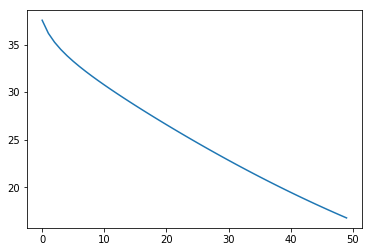

In [415]:
plt.plot(train_loss[1:])

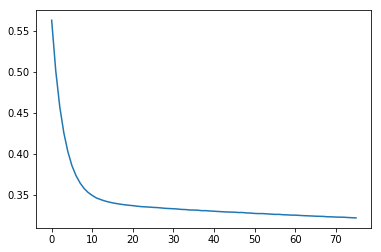

In [114]:
plt.plot(train_loss[3:])